In [1]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
%matplotlib inline

# Загружаем датасет

In [2]:
with open('hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

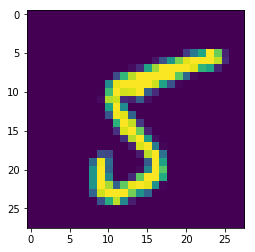

In [3]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][0].reshape(28, 28))

# Обучаем модель

In [4]:
from sklearn import cross_validation

Data_X = train['data'] / 255.
Data_Y = train['labels']

#для дальнейшего применения сигмоиды заменим 5 на -1, 6 на 1
for i in range(Data_Y.shape[0]):
    if Data_Y[i] == 5:
        Data_Y[i] = -1
    else:
        Data_Y[i] = 1
        

x_train, x_test, y_train, y_test = cross_validation.train_test_split(Data_X, Data_Y, test_size = 0.1, random_state=10)


x_train = np.hstack([ np.ones((x_train.shape[0], 1)), x_train])
x_test = np.hstack([ np.ones((x_test.shape[0], 1)), x_test])


def logloss(x,y,w):
    res = 0
    for i in range(w.shape[0]):
        res += math.log(1 + math.exp(-y[i]*(np.dot(w.T,x[i]))))
    return res  


def accuracy(x,y,w):
    counter = 0
    pred = np.dot(x, w)
    for i in range(y.shape[0]):
        if ((pred[i] >= 0.5) & (y[i] == 1)) or ((pred[i] < 0.5) & (y[i] == -1)):
            counter = counter + 1
        else:
            pass 
    return counter/y.shape[0]

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
w = np.random.normal(scale=0.001, size = x_train.shape[1])

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
alpha = 0.0005
#хотел уменьшать параметр с каждой итерацией, но получалось только хуже

for iter in tqdm.tqdm_notebook(range(350)):
    for i in range(x_train.shape[0]):
        j = np.random.randint(0, x_train.shape[0])
        grad = - (y_train[j] * x_train[j] )/( 1 + math.exp( y_train[j] * np.dot(w.T, x_train[j])))
        w = w - alpha * grad
    
    train_loss.append(logloss(x_train, y_train, w))
    test_loss.append(logloss(x_test, y_test, w))

    train_accuracy.append(accuracy(x_train, y_train, w))
    test_accuracy.append(accuracy(x_test, y_test, w))

# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

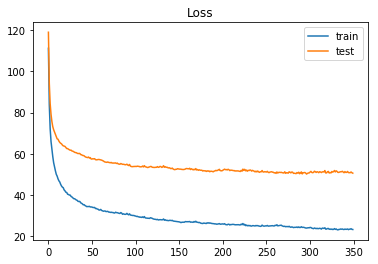

In [6]:
x = range(0,350)

plt.title('Loss')
plt.plot(x, train_loss, label='train')
plt.plot(x, test_loss, label='test')
plt.legend()

In [7]:
test_loss[349]

50.62864178490211

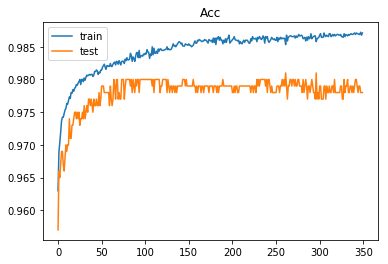

In [8]:
plt.title('Acc')
plt.plot(x, train_accuracy, label='train')
plt.plot(x, test_accuracy, label='test')
plt.legend()

In [9]:
test_accuracy

[0.957,
 0.966,
 0.965,
 0.967,
 0.969,
 0.969,
 0.967,
 0.966,
 0.968,
 0.97,
 0.969,
 0.97,
 0.97,
 0.974,
 0.971,
 0.971,
 0.973,
 0.973,
 0.974,
 0.975,
 0.975,
 0.974,
 0.975,
 0.974,
 0.975,
 0.973,
 0.974,
 0.974,
 0.975,
 0.974,
 0.976,
 0.974,
 0.975,
 0.976,
 0.975,
 0.977,
 0.977,
 0.976,
 0.977,
 0.976,
 0.975,
 0.977,
 0.976,
 0.976,
 0.977,
 0.976,
 0.976,
 0.978,
 0.976,
 0.977,
 0.979,
 0.979,
 0.979,
 0.978,
 0.978,
 0.978,
 0.978,
 0.978,
 0.978,
 0.976,
 0.979,
 0.977,
 0.976,
 0.977,
 0.98,
 0.979,
 0.977,
 0.98,
 0.98,
 0.977,
 0.978,
 0.977,
 0.977,
 0.98,
 0.98,
 0.98,
 0.977,
 0.979,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.979,
 0.98,
 0.978,
 0.98,
 0.979,
 0.978,
 0.98,
 0.979,
 0.98,
 0.98,
 0.978,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.979,
 0.98,
 0.978,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.978,
 0.979,
 0.979,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.978,
 0.98,
 0.979,
 0.978,
 0.979,
 0.979

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [10]:
X = test_no_lables['data'] / 255.
X = np.hstack([ np.ones((X.shape[0], 1)), X] )

Y_pred = np.dot(X, w)

for i in range(Y_pred.shape[0]):
    Y_pred[i] = 1./(1. + math.exp(-Y_pred[i]))

with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(X.shape[0]):
        print(i, Y_pred[i], sep=',', file=fout)

# Сдача

1. Регистрируетесь на конкурс https://www.kaggle.com/t/34e77301ef914c5792e4f4306144a6b3 
1. Преодолеваете "Pass level" baseline
1. После того, как вы преодолеете baseline, присылайте ноутбук с решение по адресу **voropaev@corp.mail.ru**

# Внимание
- Тему письма писать в формате "[МФТИ][1] Фамилия"
- Внутри писма прикрепляете файл ноутбука с именем <ваша фамилия>.ipynb